In [8]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

In [9]:
import pandas as pd
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
# 데이터 읽기
df = pd.read_csv(url)

In [10]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
cols = ['sex', 'smoker', 'region']
for col in cols:
    print(df[col].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [15]:
for col in cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [17]:
print(df.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


In [18]:
x = df.drop('charges', axis=1)
y = df['charges']

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [19]:
Y = pd.get_dummies(y).values

x_train, x_test, y_train, y_test = train_test_split(x, Y,test_size=0.25,random_state=0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1003, 6) (1003, 1337)
(335, 6) (335, 1337)


In [20]:
model = Sequential()

model.add(Dense(6,input_shape=(6,),activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 83 (332.00 Byte)
Trainable params: 83 (332.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
N_EPOCHS = 6
model_history = model.fit(x=x_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_split=0.1) # train의 10%를 validation으로 설정. 검증에 사용
y_pred = model.predict(x_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/6


29/29 [==============================] - 2s 16ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 2/6
29/29 [==============================] - 0s 4ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3/6
29/29 [==============================] - 0s 4ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4/6
29/29 [==============================] - 0s 4ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 5/6
29/29 [==============================] - 0s 4ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 6/6
11/11 [==============================] - 0s 2ms/step


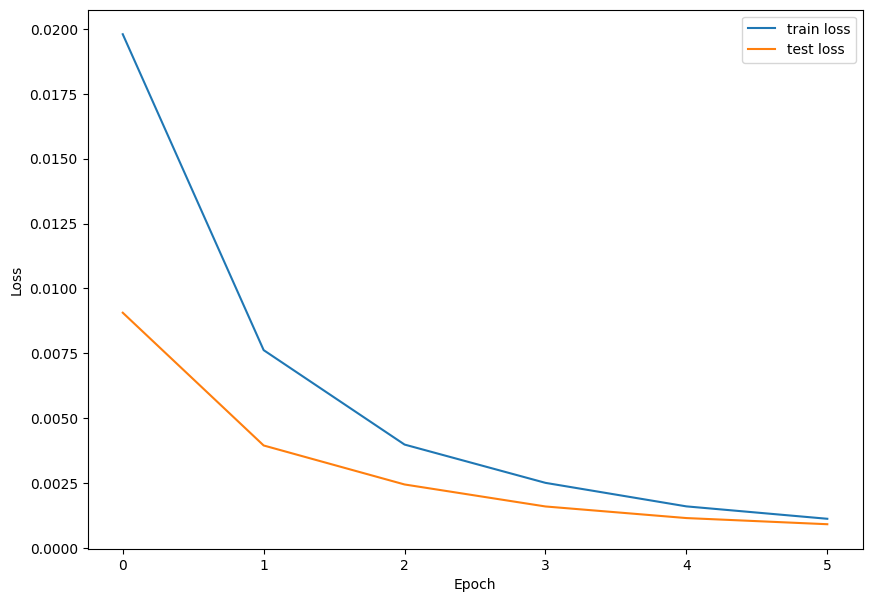

In [22]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), model_history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), model_history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
model.evaluate(x_test, y_test)

11/11 [==============================] - 0s 3ms/step - loss: 9.6299e-04 - mse: 9.6299e-04


[0.0009629948763176799, 0.0009629948763176799]

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred))

11/11 [==============================] - 0s 2ms/step


ValueError: y_true and y_pred have different number of output (1337!=1)